In [2]:
#### Importing Some Basic Libraries ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\TARUN\Downloads\Digital Marketing\digital_marketing_campaign_dataset.csv")

## Check the dimensions of the dataset

In [3]:
df.shape

(8000, 20)

## Check the datatypes 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

## check the top 5 rows of the dataset

In [40]:
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


### Performing the first Business Movemnt : Measure of Central Tendency 

In [6]:
df.describe()

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,11999.50000,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,2309.54541,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,8000.00000,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,11999.50000,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,13999.25000,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,15999.00000,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


In [ ]:
### Visulaizing Box plot to identify whether there is an outlier or not

<Axes: >

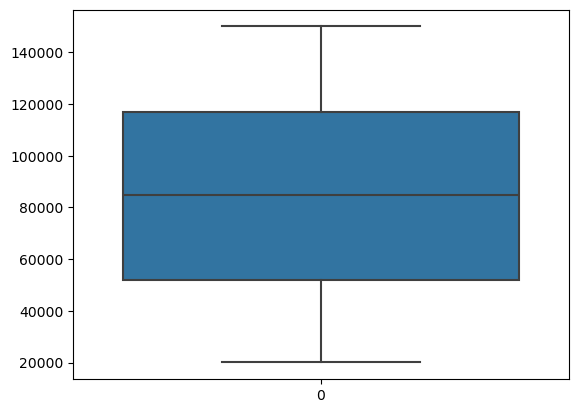

In [13]:
sns.boxplot(df.Income)

<Axes: >

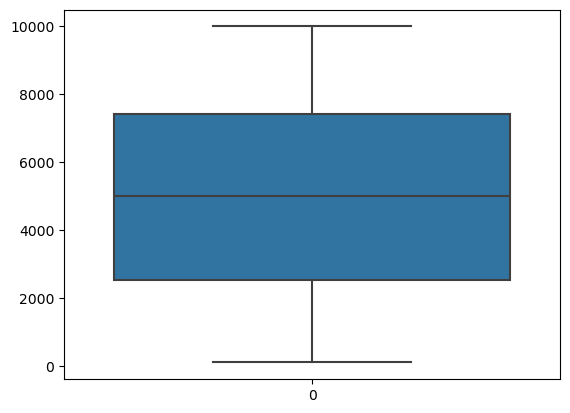

In [14]:
sns.boxplot(df.AdSpend)

# Conversion Rate

In [15]:
conversion_rate = df['Conversion'].sum() / len(df) * 100

In [16]:
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 87.65%


### Cost Per Acquasition

In [18]:
total_cost = df['AdSpend'].sum()
total_customers = len(df[df['Conversion'] == 1])
cpa = total_cost / total_customers
print(f"Cost per Acquisition (CPA): RS {cpa:.2f}")

Cost per Acquisition (CPA): RS 5705.58


## Conversion Rate by Campaign Channel

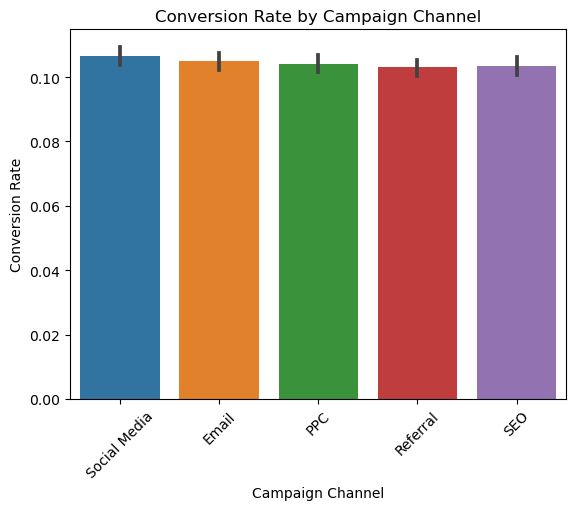

In [21]:
sns.barplot(x='CampaignChannel', y='ConversionRate', data=df)
plt.xlabel("Campaign Channel")
plt.ylabel("Conversion Rate")
plt.title("Conversion Rate by Campaign Channel")
plt.xticks(rotation=45)
plt.show()

In [ ]:
##### Diversity of the Popoulation.

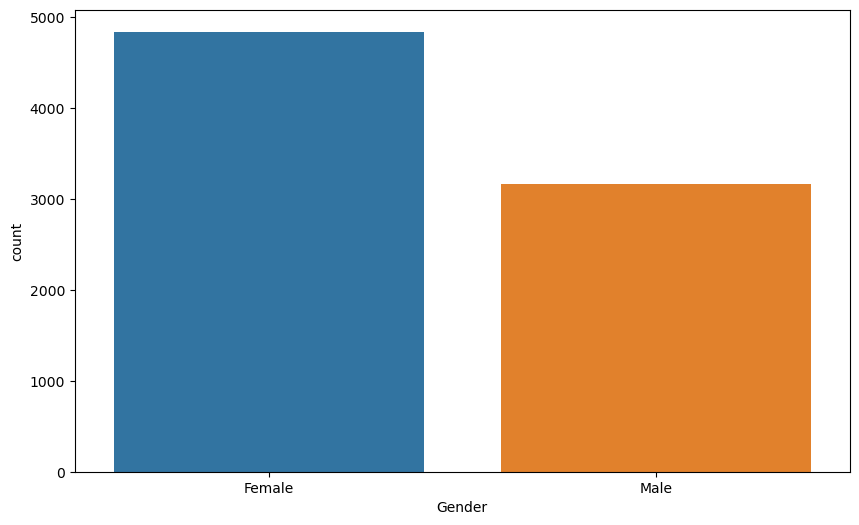

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender')
plt.show()

#### The most Used Campaign Type

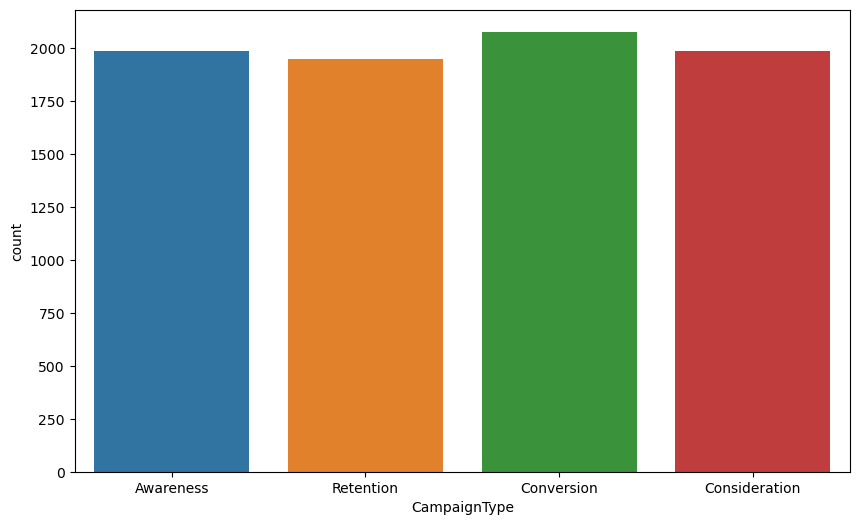

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CampaignType')
plt.show()

#### The most Used Campaign Channel

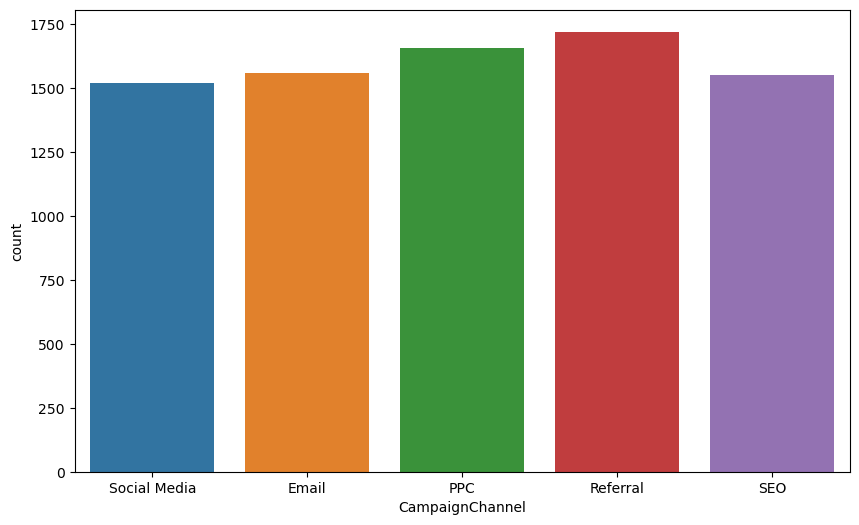

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CampaignChannel')
plt.show()

#### Conversion on the basis of Time Spend on Site

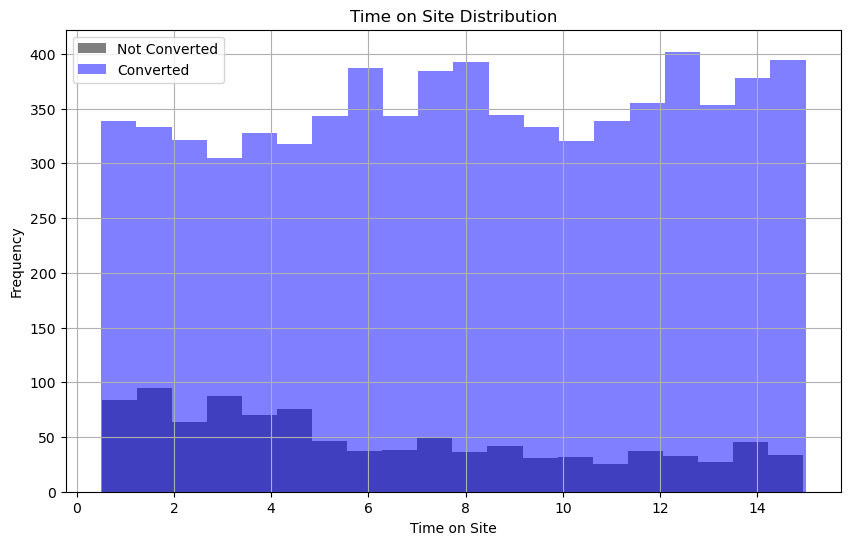

In [30]:
plt.figure(figsize=(10, 6))
df[df['Conversion'] == 0]['TimeOnSite'].hist(bins=20, alpha=0.5, label='Not Converted',color = "black")
df[df['Conversion'] == 1]['TimeOnSite'].hist(bins=20, alpha=0.5, label='Converted',color = "blue")
plt.title('Time on Site Distribution')
plt.xlabel('Time on Site')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#### Conversion on the basis of WebsiteVisits

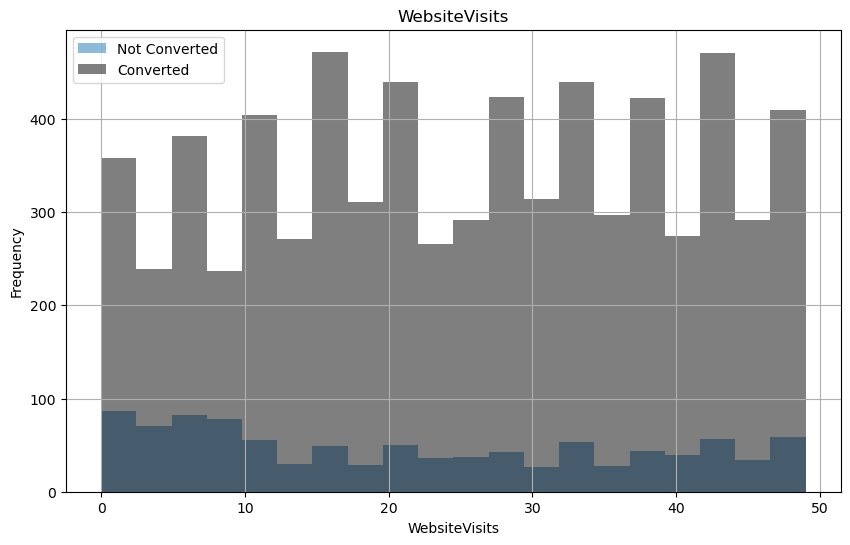

In [10]:
plt.figure(figsize=(10, 6))
df[df['Conversion'] == 0]['WebsiteVisits'].hist(bins=20, alpha=0.5, label='Not Converted')
df[df['Conversion'] == 1]['WebsiteVisits'].hist(bins=20, alpha=0.5, label='Converted',color = "black")
plt.title('WebsiteVisits')
plt.xlabel('WebsiteVisits')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
                                                          FINAL CONCLUSION 